In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
import pandas
from sklearn import model_selection
import pickle
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Check to see if dataset is balanced

In [4]:
mean = dataset.tenure.mean()
std = dataset.tenure.std()
print("mean:{}, std:{}".format(mean, std))

mean:32.37114865824223, std:24.55948102309446


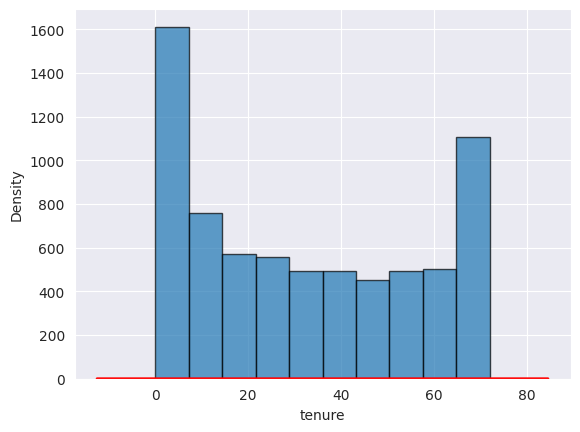

In [5]:
plt.hist(dataset.tenure, bins=10, edgecolor='black', alpha=0.7)  
sns.kdeplot(dataset.tenure, color='red', linewidth=2)
plt.show()

In [6]:
numeric_data = dataset.loc[:,['tenure', 'MonthlyCharges']]
numeric_data

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


Scaling the dataset

In [7]:
from sklearn import preprocessing
d = preprocessing.normalize(numeric_data)
scaled_df = pd.DataFrame(d, columns=numeric_data.columns)
print(scaled_df)

        tenure  MonthlyCharges
0     0.033482        0.999439
1     0.512610        0.858622
2     0.037115        0.999311
3     0.728628        0.684910
4     0.028277        0.999600
...        ...             ...
7038  0.272322        0.962206
7039  0.572182        0.820127
7040  0.348346        0.937366
7041  0.053686        0.998558
7042  0.529819        0.848111

[7043 rows x 2 columns]


Make categories to numbers!

In [8]:
dataset['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [9]:
dataset['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [10]:
dataset['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [11]:
dataset['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
dataset['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [13]:
dataset['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
encoder = LabelEncoder()
dataset['gender'] = encoder.fit_transform(dataset['gender'])
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
yes_no_internet_columns = ['OnlineSecurity', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'OnlineBackup']
dataset[yes_no_columns] = dataset[yes_no_columns].replace({'Yes': 1, 'No': 0})
dataset[yes_no_internet_columns] = dataset[yes_no_internet_columns].replace({'No internet service': 2, 'Yes': 1, 'No':0})
dataset['MultipleLines'] = dataset['MultipleLines'].replace({'Yes': 2, 'No': 2, 'No phone service':0})
dataset['InternetService'] = dataset['InternetService'].replace({'No': 2, 'Fiber optic': 2, 'DSL':0})
dataset['Contract'] = dataset['Contract'].replace({'Two year': 2, 'One year': 2, 'Month-to-month':0})
dataset['PaymentMethod'] = dataset['PaymentMethod'].replace({'Credit card (automatic)': 3, 'Bank transfer (automatic)': 2, 'Mailed check':1, 'Electronic check': 0})
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(0)
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,2,0,1,...,1,0,0,0,2,0,1,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,2,0,1,...,0,0,0,0,0,1,1,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,1,1,0,0,2,0,2,42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,2,2,0,...,0,0,0,0,0,1,0,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,1,...,1,1,1,1,2,1,1,84.80,1990.50,No
7039,2234-XADUH,0,0,1,1,72,1,2,2,0,...,1,0,1,1,2,1,3,103.20,7362.90,No
7040,4801-JZAZL,0,0,1,1,11,0,0,0,1,...,0,0,0,0,0,1,0,29.60,346.45,No
7041,8361-LTMKD,1,1,1,0,4,1,2,2,0,...,0,0,0,0,0,1,1,74.40,306.60,Yes


In [15]:
dataset.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Logistic Regression

In [16]:
X = dataset.iloc[:, 1:20]
y = dataset.loc[:, ['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/home/annabelle/PycharmProjects/Churn_Analysis/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/annabelle/PycharmProjects/Churn_Analysis/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1163,  135],
       [ 219,  244]])

In [17]:
logreg.score(X_train, y_train)

0.8017796289284362

# Guassian

In [18]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/home/annabelle/PycharmProjects/Churn_Analysis/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[917, 381],
       [106, 357]])

In [19]:
gaussian.score(X_train, y_train)

0.7330556607345703

The accuracy of this model is less than logistic regression, lets see if the model works better with scaled data

In [20]:
d = preprocessing.normalize(X)
scaled_df = pd.DataFrame(d, columns=X.columns)
print(scaled_df)

        gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0     0.000000       0.000000  0.023662    0.000000  0.023662      0.000000   
1     0.000529       0.000000  0.000000    0.000000  0.017983      0.000529   
2     0.008273       0.000000  0.000000    0.000000  0.016546      0.008273   
3     0.000543       0.000000  0.000000    0.000000  0.024433      0.000000   
4     0.000000       0.000000  0.000000    0.000000  0.011950      0.005975   
...        ...            ...       ...         ...       ...           ...   
7038  0.000502       0.000000  0.000502    0.000502  0.012045      0.000502   
7039  0.000000       0.000000  0.000136    0.000136  0.009777      0.000136   
7040  0.000000       0.000000  0.002874    0.002874  0.031619      0.000000   
7041  0.003169       0.003169  0.003169    0.000000  0.012676      0.003169   
7042  0.000146       0.000000  0.000000    0.000000  0.009641      0.000146   

      MultipleLines  InternetService  OnlineSecurit

In [21]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, random_state=0, train_size = .75)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/home/annabelle/PycharmProjects/Churn_Analysis/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1195,  103],
       [ 340,  123]])

In [22]:
gaussian.score(X_train, y_train)

0.7588034835289663

The result is better this way but still less than logistic regression

# Decision Tree

In [23]:
DT = DecisionTreeClassifier()
DT = DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1063,  235],
       [ 233,  230]])

In [24]:
DT.score(X_train, y_train)

0.9973494888299886

Decision tree is significantly improved but we should see if it's not overfitted

In [28]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 5)]
for i in values:
	model = DecisionTreeClassifier(max_depth=i)
	model.fit(X_train, y_train)
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.734, test: 0.737
>2, train: 0.765, test: 0.747
>3, train: 0.794, test: 0.773
>4, train: 0.802, test: 0.775


In [29]:
DT = DecisionTreeClassifier(max_depth=5)
DT = DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1112,  186],
       [ 194,  269]])

In [30]:
DT.score(X_train, y_train)

0.807080651268459

Seems depth 5 is a good depth. This result is already better than logistic regression but lets see if it will be improved with scaled data.

In [31]:
d = preprocessing.normalize(X)
scaled_df = pd.DataFrame(d, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, random_state=0, train_size = .75)
DT = DecisionTreeClassifier(max_depth=5)
DT = DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1150,  148],
       [ 239,  224]])

In [32]:
DT.score(X_train, y_train)

0.8108670957970465

This result is better so lets save the model so it will be used later

In [33]:
filename = 'churn_prediction.sav'
pickle.dump(DT, open(filename, 'wb'))